# Wine Quality EDA 
[Wine Quality EDA kor](https://www.kaggle.com/code/rakgyunim/wine-quality-eda-kor/notebook)

### Import and Load

In [1]:
!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv 

--2022-10-30 07:45:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

100%[======================================>] 84,199       195KB/s   in 0.4s   

2022-10-30 07:45:32 (195 KB/s) - ‘winequality-red.csv’ saved [84199/84199]

--2022-10-30 07:45:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

100%[==========================

In [2]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

In [3]:
font_ = {'size': 14}
axes_ = {'prop_cycle': cycler(color=['#3eb489'] +
                              plt.rcParams['axes.prop_cycle'].by_key()['color'][1:])}
plt.rc('font', **font_)
plt.rc('axes', **axes_)

In [7]:
wine_red = pd.read_csv('./winequality-red.csv', sep=';')
wine_white = pd.read_csv('./winequality-white.csv', sep=';')

### Quick View

In [8]:
wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Metadata:
- fixed acidity: most acids involved with wine (do not evaporate readily)
- volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
- residual sugar: the amount of sugar remaining after fermentation stops
- chlorides: the amount of salt in the wine
- free sulfur dioxide: the free form of SO2, it prevents microbial growth and the oxidation of wine
- total sulfur dioxide: amount of free and bound forms of S02; evident in the nose and taste of wine
- density: the density of water is close to that of water depending on the percent alcohol and sugar content
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- alcohol: the percent alcohol content of the wine
- quality: output variable (based on sensory data, score between 0 and 10)

In [11]:
# 크기 및 데이터 확인
display(wine_red.head(3))
print("wine_red.shape:", wine_red.shape, '\n')

display(wine_white.head(3))
print("wine_white.shape:", wine_white.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


wine_red.shape: (1599, 12) 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


wine_white.shape: (4898, 12)


In [12]:
# 결측치 확인
print("wine_red 데이터의 결측치 수:", wine_red.isna().sum().sum())
print("wine_white 데이터의 결측치 수:", wine_white.isna().sum().sum())

wine_red 데이터의 결측치 수: 0
wine_white 데이터의 결측치 수: 0


In [13]:
# 중복값 확인 후 제거
print("wine_red의 중복 데이터 수:", wine_red.duplicated().sum())
wine_red = wine_red.drop_duplicates().reset_index(drop=True)
print("wine_white의 중복 데이터 수:", wine_white.duplicated().sum())
wine_white = wine_white.drop_duplicates().reset_index(drop=True)

wine_red의 중복 데이터 수: 240
wine_white의 중복 데이터 수: 937


In [14]:
# 제거 후 크기
print("wine_red.shape:", wine_red.shape)
print("wine_white.shape:", wine_white.shape)

wine_red.shape: (1359, 12)
wine_white.shape: (3961, 12)


In [15]:
# wine 색 특성 추가 후 concat
wine_red['color'] = 'red'
wine_white['color'] = 'white'

wine = pd.concat([wine_red, wine_white], axis=0)

In [16]:
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1355,5.8,0.19,0.49,4.9,0.040,44.0,118.0,0.99350,3.34,0.38,9.5,7,white
3026,8.5,0.18,0.30,1.1,0.028,34.0,95.0,0.99272,2.83,0.36,10.0,4,white
21,6.9,0.24,0.35,1.0,0.052,35.0,146.0,0.99300,3.45,0.44,10.0,6,white
2247,8.2,0.37,0.64,13.9,0.043,22.0,171.0,0.99873,2.99,0.80,9.3,5,white
897,6.7,0.26,0.26,4.0,0.079,35.5,216.0,0.99560,3.31,0.68,9.5,5,white


In [17]:
# 추후 사용을 위해 병합한 데이터프레임을 csv로 저장
wine.to_csv('./wine_concat.csv', index=False)

### EDA

In [18]:
wine = pd.read_csv('./wine_concat.csv')

In [19]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Quality 분포

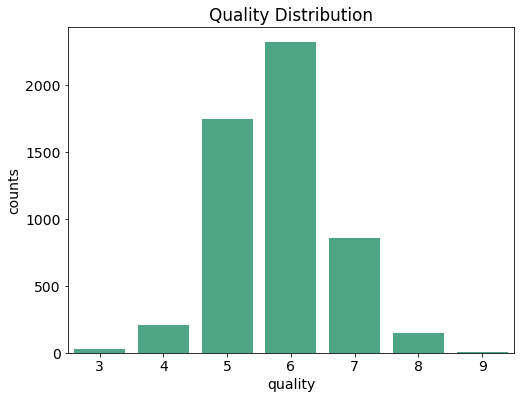

In [20]:
quality_ = wine['quality'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=quality_.index, y=quality_.values, 
            color='#3eb489')
plt.title('Quality Distribution')
plt.xlabel('quality')
plt.ylabel('counts')
plt.show()

타겟 데이터인 등급은 가운데인 6등급이 가장 많이 나타났다. 그 다음 5등급, 7등급 순으로 6등급 기준으로 점차 감소하는 종 모양을 나타낸다.

### Correlation

In [21]:
# color encode 0: red, 1: white
wine['color_num'] = wine['color'].map({'red': 0, 'white': 1})

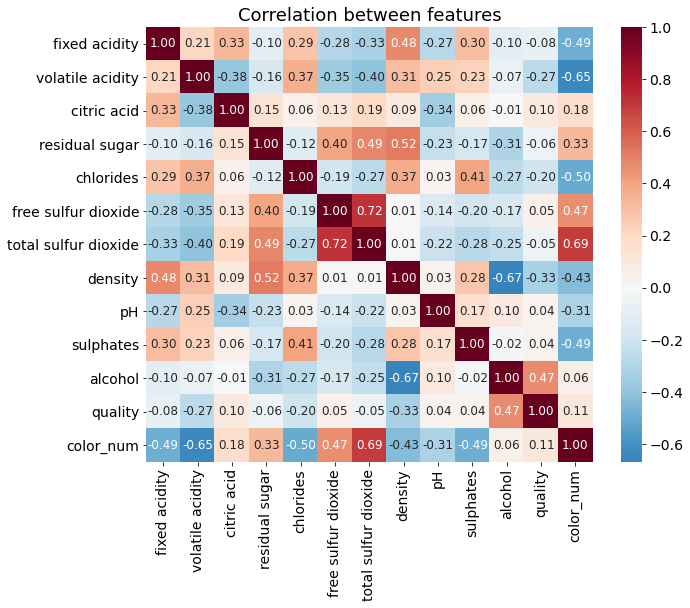

In [22]:
# 특성별 상관계수 heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(wine.corr(), annot=True, fmt='.2f',
            cmap='RdBu_r', center=0, annot_kws={"fontsize":12})
plt.title('Correlation between features', fontsize=18)
plt.show()

In [23]:
# 와인 등급과 다른 특성과의 상관계수 (절댓값)
wine.corrwith(wine['quality']).abs().sort_values(ascending=False)[1:]

alcohol                 0.469422
density                 0.326434
volatile acidity        0.265205
chlorides               0.202137
color_num               0.114809
citric acid             0.097954
fixed acidity           0.080092
residual sugar          0.056830
free sulfur dioxide     0.054002
total sulfur dioxide    0.050296
sulphates               0.041884
pH                      0.039733
dtype: float64

대부분의 특성이 등급과 큰 상관관계를 가지지 않지만 알콜 도수가 0.47정도로 가장 높게 나타났다. 그 다음으로 높은 특성은 밀도이다. volatile acidity는 metadata에서처럼 큰 값이 될수록 강하고 좋지 않은 신맛이 나 등급과는 음의 상관관계를 타나낸다. 등급과의 연관성이 비교적 높은 5개의 특성(상관계수 > 0.1)이 등급에 따라 어떻게 나타난지 확인한다.

### 특성별 Quality 분포

### Alcohol

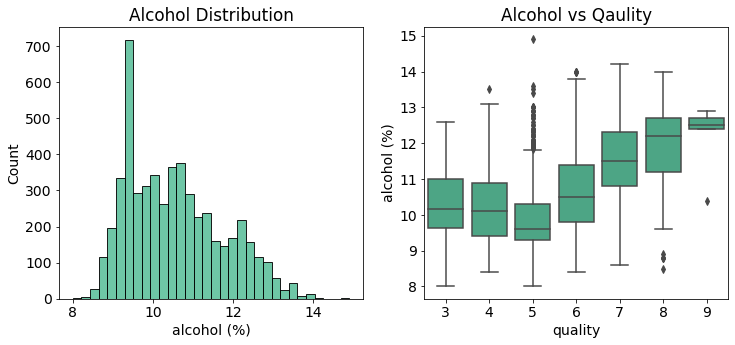

In [24]:
# 알콜 데이터의 분포와 등급에 대한 알콜 도수
color_ = '#3eb489'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=wine, x='alcohol', ax=axes[0])
sns.boxplot(data=wine, x='quality', y='alcohol', color=color_, ax=axes[1])
axes[0].set_title('Alcohol Distribution')
axes[0].set_xlabel('alcohol (%)')
axes[1].set_title('Alcohol vs Qaulity')
axes[1].set_ylabel('alcohol (%)')
plt.show()

In [25]:
# 알콜 도수가 집중되어있는 9.5%에 있는 와인은 어떤 등급인가
wine.groupby('alcohol')['quality'].value_counts().sort_values(ascending=False)[:5]

alcohol  quality
9.5      5          168
9.4      5          164
9.2      5          121
9.3      5          109
9.5      6          101
Name: quality, dtype: int64

알콜 도수는 9.5% 부근에 대부분 위치하며 대부분의 등급이 5이다. 때문에 알콜과 등급을 비교한 그래프에서 다른 등급보다 Q3의 값이 낮고 이상치가 많이 존재한다. 또한 등급 5일때 박스가 다른 등급에 비해 낮은 곳에 위치한다. 5등급보다 높은 등급에서는 등급이 올라갈 수록 알콜 도수가 증가함을 볼 수 있다.

### Density

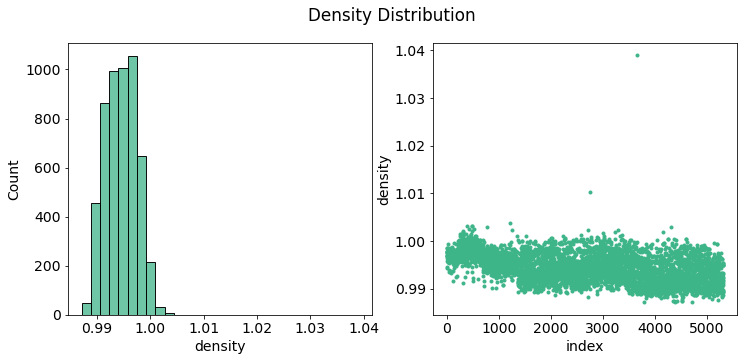

In [26]:
# 밀도 분포
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=wine, x='density', bins=30, ax=axes[0])
axes[1].plot(wine.index, wine['density'], '.', )
axes[1].set_xlabel('index')
axes[1].set_ylabel('density')
plt.suptitle('Density Distribution')
plt.show()

In [27]:
wine[wine['density']>1.01]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,color_num
2753,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,white,1
3653,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,white,1


밀도 데이터에서 다른값에 비해 차이가 많이나는 이상치 데이터가 2개 있다. 두 레코드 때문에 그래프가 제대로 출력되지 않으므로 이를 제외한 그래프를 다시 그리면 다음과 같다.

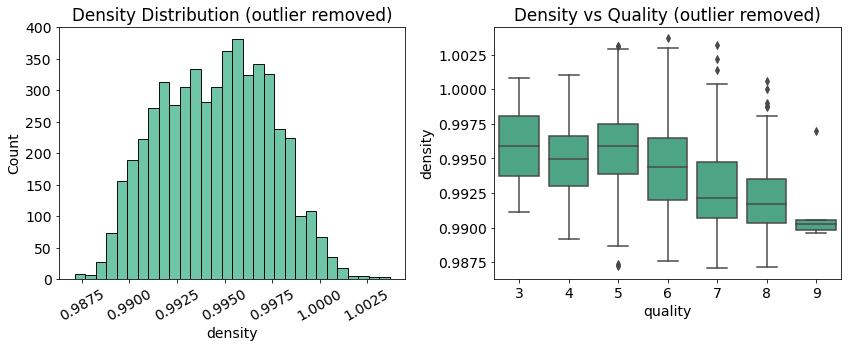

In [28]:
# 이상치 제거 후 밀도 분포
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
filtered = wine.query("density < 1.01")
sns.histplot(data=filtered, x='density', bins=30, ax=axes[0])
sns.boxplot(data=filtered, x='quality', y='density', color=color_, ax=axes[1])
axes[0].set_title('Density Distribution (outlier removed)')
axes[0].tick_params(axis='x', labelrotation=30)
axes[1].set_title('Density vs Quality (outlier removed)')
plt.tight_layout()
plt.show()

이상치를 제외한 밀도 분포는 두꺼운 정규분포 형태를 띄고 있다. 등급별로 변화를 보면 상관계수에서 보았듯이 등급이 증가할 수록 밀도가 내려간다. 단 5등급일 때는 중앙값이 밀도의 중앙값이 살짝 증가한다. 이러한 결과는 알콜과 밀도 사이의 상관관계(상관계수: -0.67)에서도 알 수 있다. 알콜의 비중이 물보다 낮아 알콜이 많이 들어있을 경우 밀도가 낮아지게 된다. 등급이 올라갈수록 알콜 도수가 증가한 것에 반해 밀도는 감소하는 것을 그래프로 잘 알 수 있다.

### Volatile Acidity

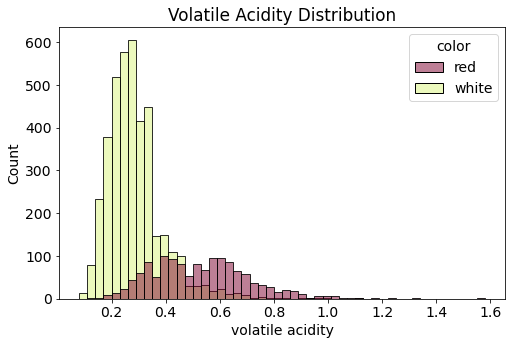

In [29]:
palette = ['#7e002f', '#dbf47c']

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=wine, x='volatile acidity', hue='color',
             palette=palette, bins=50)
plt.title('Volatile Acidity Distribution')
plt.show()

휘발성산(Volatile Acidity)의 분포는 와인의 색에 따라 확연한 차이가 나타난다. 화이트 와인은 0.3 부근에 대부분이 몰려있는 반면 레드 와인은 0.3부터 0.7이상까지 비교적 고르게 분포한다.

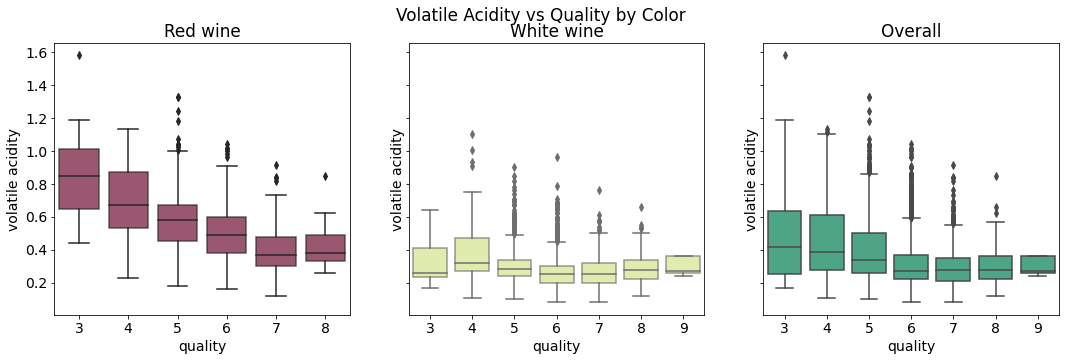

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, color in enumerate(['red', 'white']):
    sns.boxplot(data=wine.query("color==@color"),
                x='quality', y='volatile acidity', color=palette[i],
                boxprops=dict(alpha=0.7), ax=axes[i])
sns.boxplot(data=wine,
            x='quality', y='volatile acidity', color=color_,
            ax=axes[2])

axes[0].set_title('Red wine')
axes[1].set_title('White wine')
axes[2].set_title('Overall')
plt.suptitle("Volatile Acidity vs Quality by Color")
plt.show()

와인 색에 따라 휘발성산의 분포가 확연히 다르기 때문에 둘로 나누어 등급에 따른 박스 플롯을 그렸다. 레드 와인은 등급이 올라갈 수록 휘발성산의 양이 줄어들지만 화이트 와인에서는 등급별 차이가 눈에 띄가 다르지 않다. 휘발성산과 등급의 상관계수에서는 크게 높은 값을 가지진 않았는데(0.26) 이는 레드 와인의 데이터보다 화이트 와인의 데이터가 3배정도 많고, 화이트 와인의 휘발성산은 등급과 관련이 없어 억제되기 떄문이다.

### Chlorides

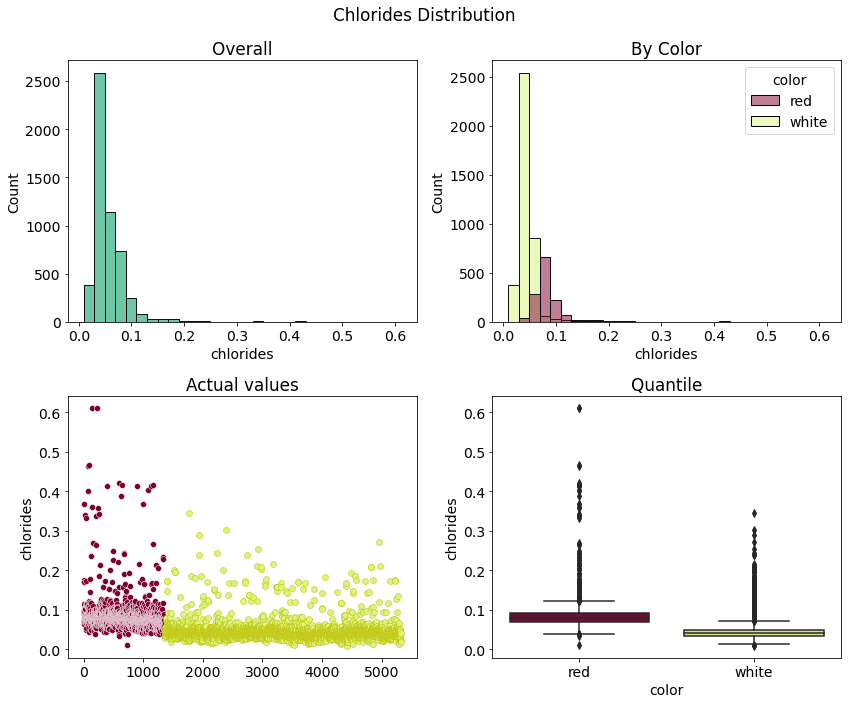

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=wine, x='chlorides', bins=30, ax=axes[0, 0])
sns.histplot(data=wine, x='chlorides', hue='color',
             palette=palette, bins=30, ax=axes[0, 1])

wine_colors = ['red', 'white']
for i, (color, edgecolor) in enumerate(zip(wine_colors, ['white', 'y'])):
    sns.scatterplot(data=wine.query("color==@color"),
                    x=wine.query("color==@color").index, y='chlorides',
                    color=palette[i], edgecolor=edgecolor, ax=axes[1, 0])
    
sns.boxplot(data=wine, x='color', y='chlorides',
            palette=palette, ax=axes[1, 1])

titles = ['Overall', 'By Color', 'Actual values', 'Quantile']
for i, title in enumerate(titles):
    axes[i//2, i%2].set_title(title)
plt.suptitle('Chlorides Distribution')
plt.tight_layout()
plt.show()

대부분의 값이 0에서 0.15 사이에 분포하지만 화이트 와인이 레드 와인보다 낮은 염화이온 양을 가진다. 하지만 이상치 때문에 데이터가 제대로 표시되지 않고 있다. q=0.98 이상의 이상치(약 110개)를 제거한 후 다시 그래프를 그리면 다음처럼 나타난다.

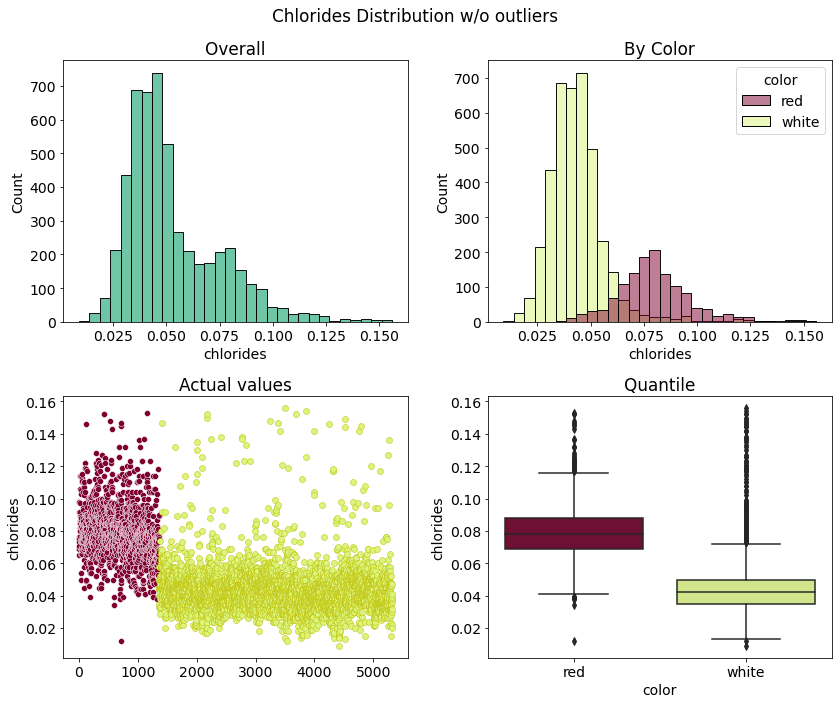

In [32]:
filtered = wine[wine['chlorides'] < wine['chlorides'].quantile(0.98)]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=filtered, x='chlorides', bins=30, ax=axes[0, 0])
sns.histplot(data=filtered, x='chlorides', hue='color',
             palette=palette, bins=30, ax=axes[0, 1])

for i, (color, edgecolor) in enumerate(zip(wine_colors, ['white', 'y'])):
    sns.scatterplot(data=filtered.query("color==@color"),
                    x=filtered.query("color==@color").index, y='chlorides',
                    color=palette[i], edgecolor=edgecolor, ax=axes[1, 0])
    
sns.boxplot(data=filtered, x='color', y='chlorides',
            palette=palette, ax=axes[1, 1])

titles = ['Overall', 'By Color', 'Actual values', 'Quantile']
for i, title in enumerate(titles):
    axes[i//2, i%2].set_title(title)
plt.suptitle('Chlorides Distribution w/o outliers')
plt.tight_layout()
plt.show()

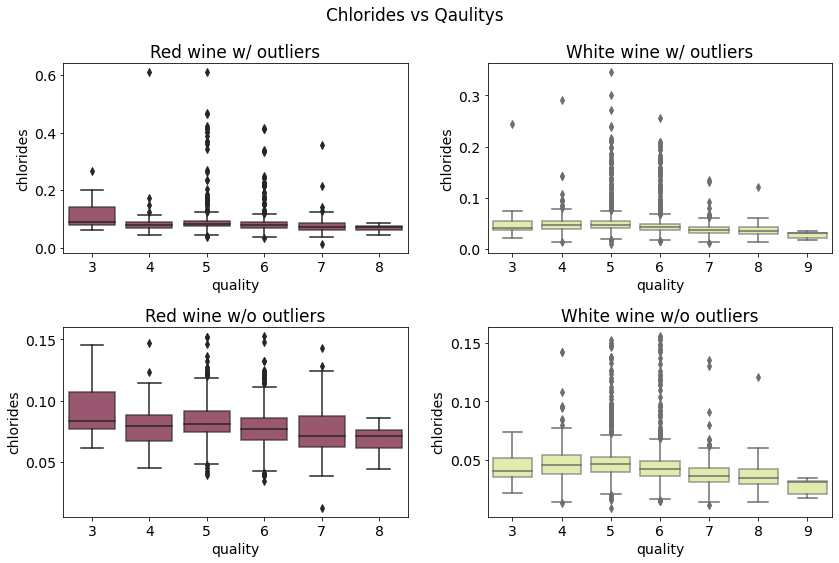

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, df in enumerate([wine, filtered]):
    for j, color in enumerate(wine_colors):
        sns.boxplot(data=df.query("color==@color"), x='quality', y='chlorides',
                    color=palette[j], boxprops=dict(alpha=0.7), ax=axes[i, j])

for i, w_o in enumerate(['w/', 'w/o']):
    for j, color in enumerate(wine_colors):
        axes[i, j].set_title(f"{color.title()} wine {w_o} outliers")
plt.suptitle("Chlorides vs Qaulitys")
plt.tight_layout()
plt.show()

등급이 증가하면서 염화이온의 양이 줄어들기는 하지만 변화는 거의 미미하다.

### Color

In [34]:
wine_quality = wine.groupby('color')['quality'].value_counts(normalize=True)
wine_quality.name = 'proportion'
wine_quality = wine_quality.reset_index()

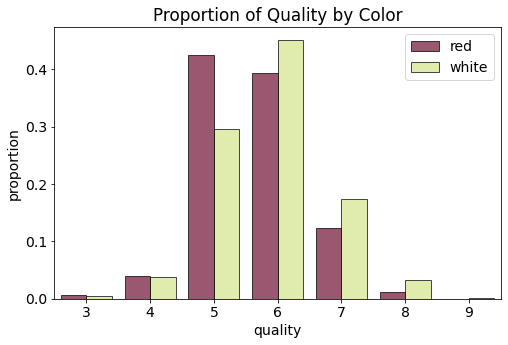

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=wine_quality, x='quality', y='proportion',
            hue='color', palette=palette,
            edgecolor='k', alpha=0.7, ax=ax)
plt.title('Proportion of Quality by Color')
plt.legend(loc='upper right')
plt.show()

In [36]:
wine_quality_diff = wine_quality.pivot(index='quality', columns='color', values='proportion')
wine_quality_diff['prop_diff'] = wine_quality_diff['red'] - wine_quality_diff['white']
custom_palette = wine_quality_diff['prop_diff'].map(lambda x: palette[0] if x > 0 else palette[1])
wine_quality_diff = wine_quality_diff.reset_index()

Text(0.5, 1.0, 'Proportion difference between Red/White wine')

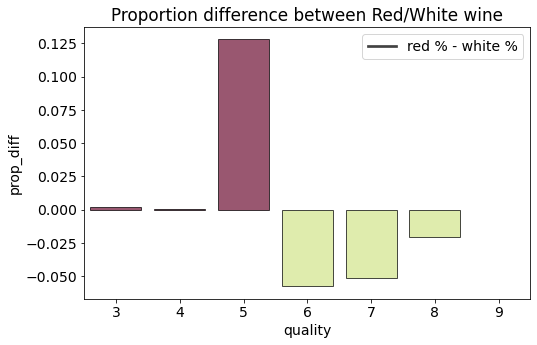

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(data=wine_quality_diff, x='quality', y='prop_diff',
            palette=custom_palette, alpha=0.7, edgecolor='k')
plt.legend(['red % - white %'], loc='upper right')
plt.title('Proportion difference between Red/White wine')

대부분의 와인이 5, 6, 7 등급에 포함된다. 그 중에서 레드 와인은 화이트 와인보다 5등급에 더 많이 있고 화이트 와인은 6, 7 등급에 더 많이 분포한다. 다른 3, 4등급에서는 포함된 와인의 절대적인 수가 부족하지만 레드 와인과 화이트 와인의 비율이 거의 비슷하다. 높은 등급인 8등급에는 6, 7 등급과 마찬가지로 화이트 와인이 더 많이 있고 9등급에는 화이트 와인만 있다.

### Conclusion

높은 등급일수록:

- 알콜 도수가 높다.
- 밀도가 낮다.
- 레드 와인에서는 휘발성산(Volatile Acidity)가 낮아진다. (휘발성산이 특정 임계보다 높아지면 역한 신맛이 난다.)
- 염화이온(소금의 원소)가 낮지만 변화는 거의 적다. 화이트 와인에서는 이런 변화가 더 적다.
- 화이트 와인일 확률이 약간 더 높다.